# Problem statement
Build a relevant machine learning model to predict whether person has heart disease or not

In [ ]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
##loading the dataset
data=pd.read_csv('/content/heart.csv')

NameError: ignored

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Basic checks

In [ ]:
data.head()#first five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.tail()#last five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
cat_data=data.select_dtypes(include='O').columns
cat_data

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('------------------------------')

Sex ['M' 'F']
M    725
F    193
Name: Sex, dtype: int64
------------------------------
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------
RestingECG ['Normal' 'ST' 'LVH']
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------
ExerciseAngina ['N' 'Y']
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------
ST_Slope ['Up' 'Flat' 'Down']
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------


# Exploratory Data Analysis (EDA)

### Univariate Analysis

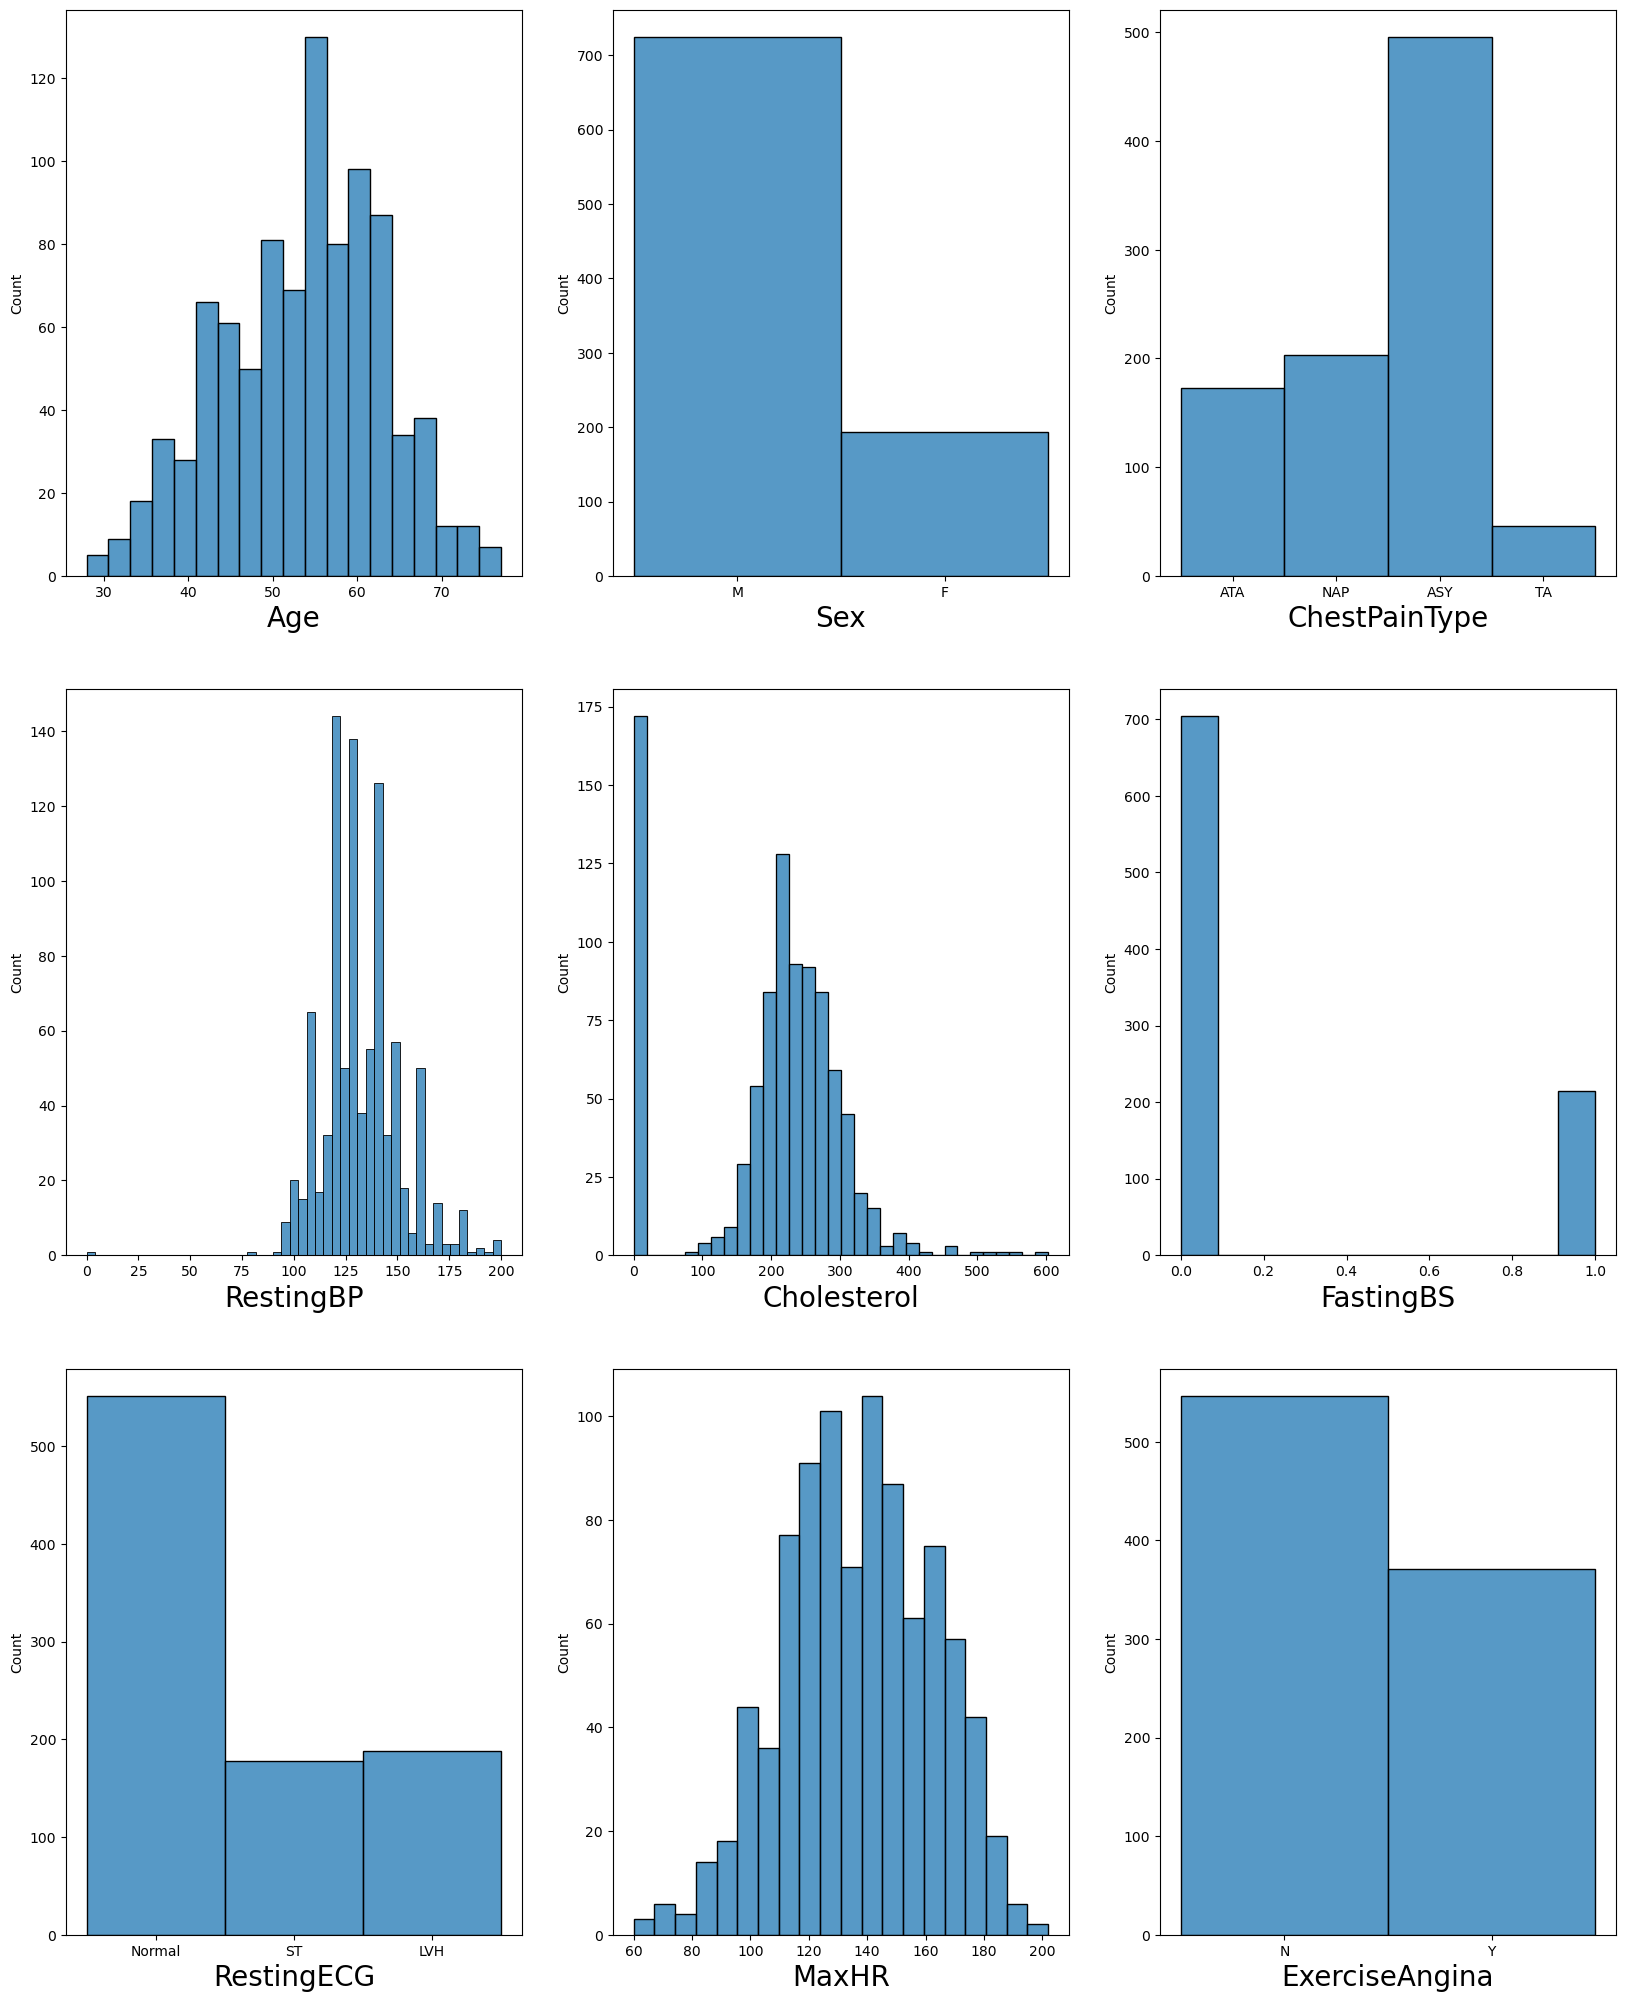

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas


for column in data.columns: # iteration of columns / acessing the columns from  dataset
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=data[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20

    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

### Bivariant Analysis

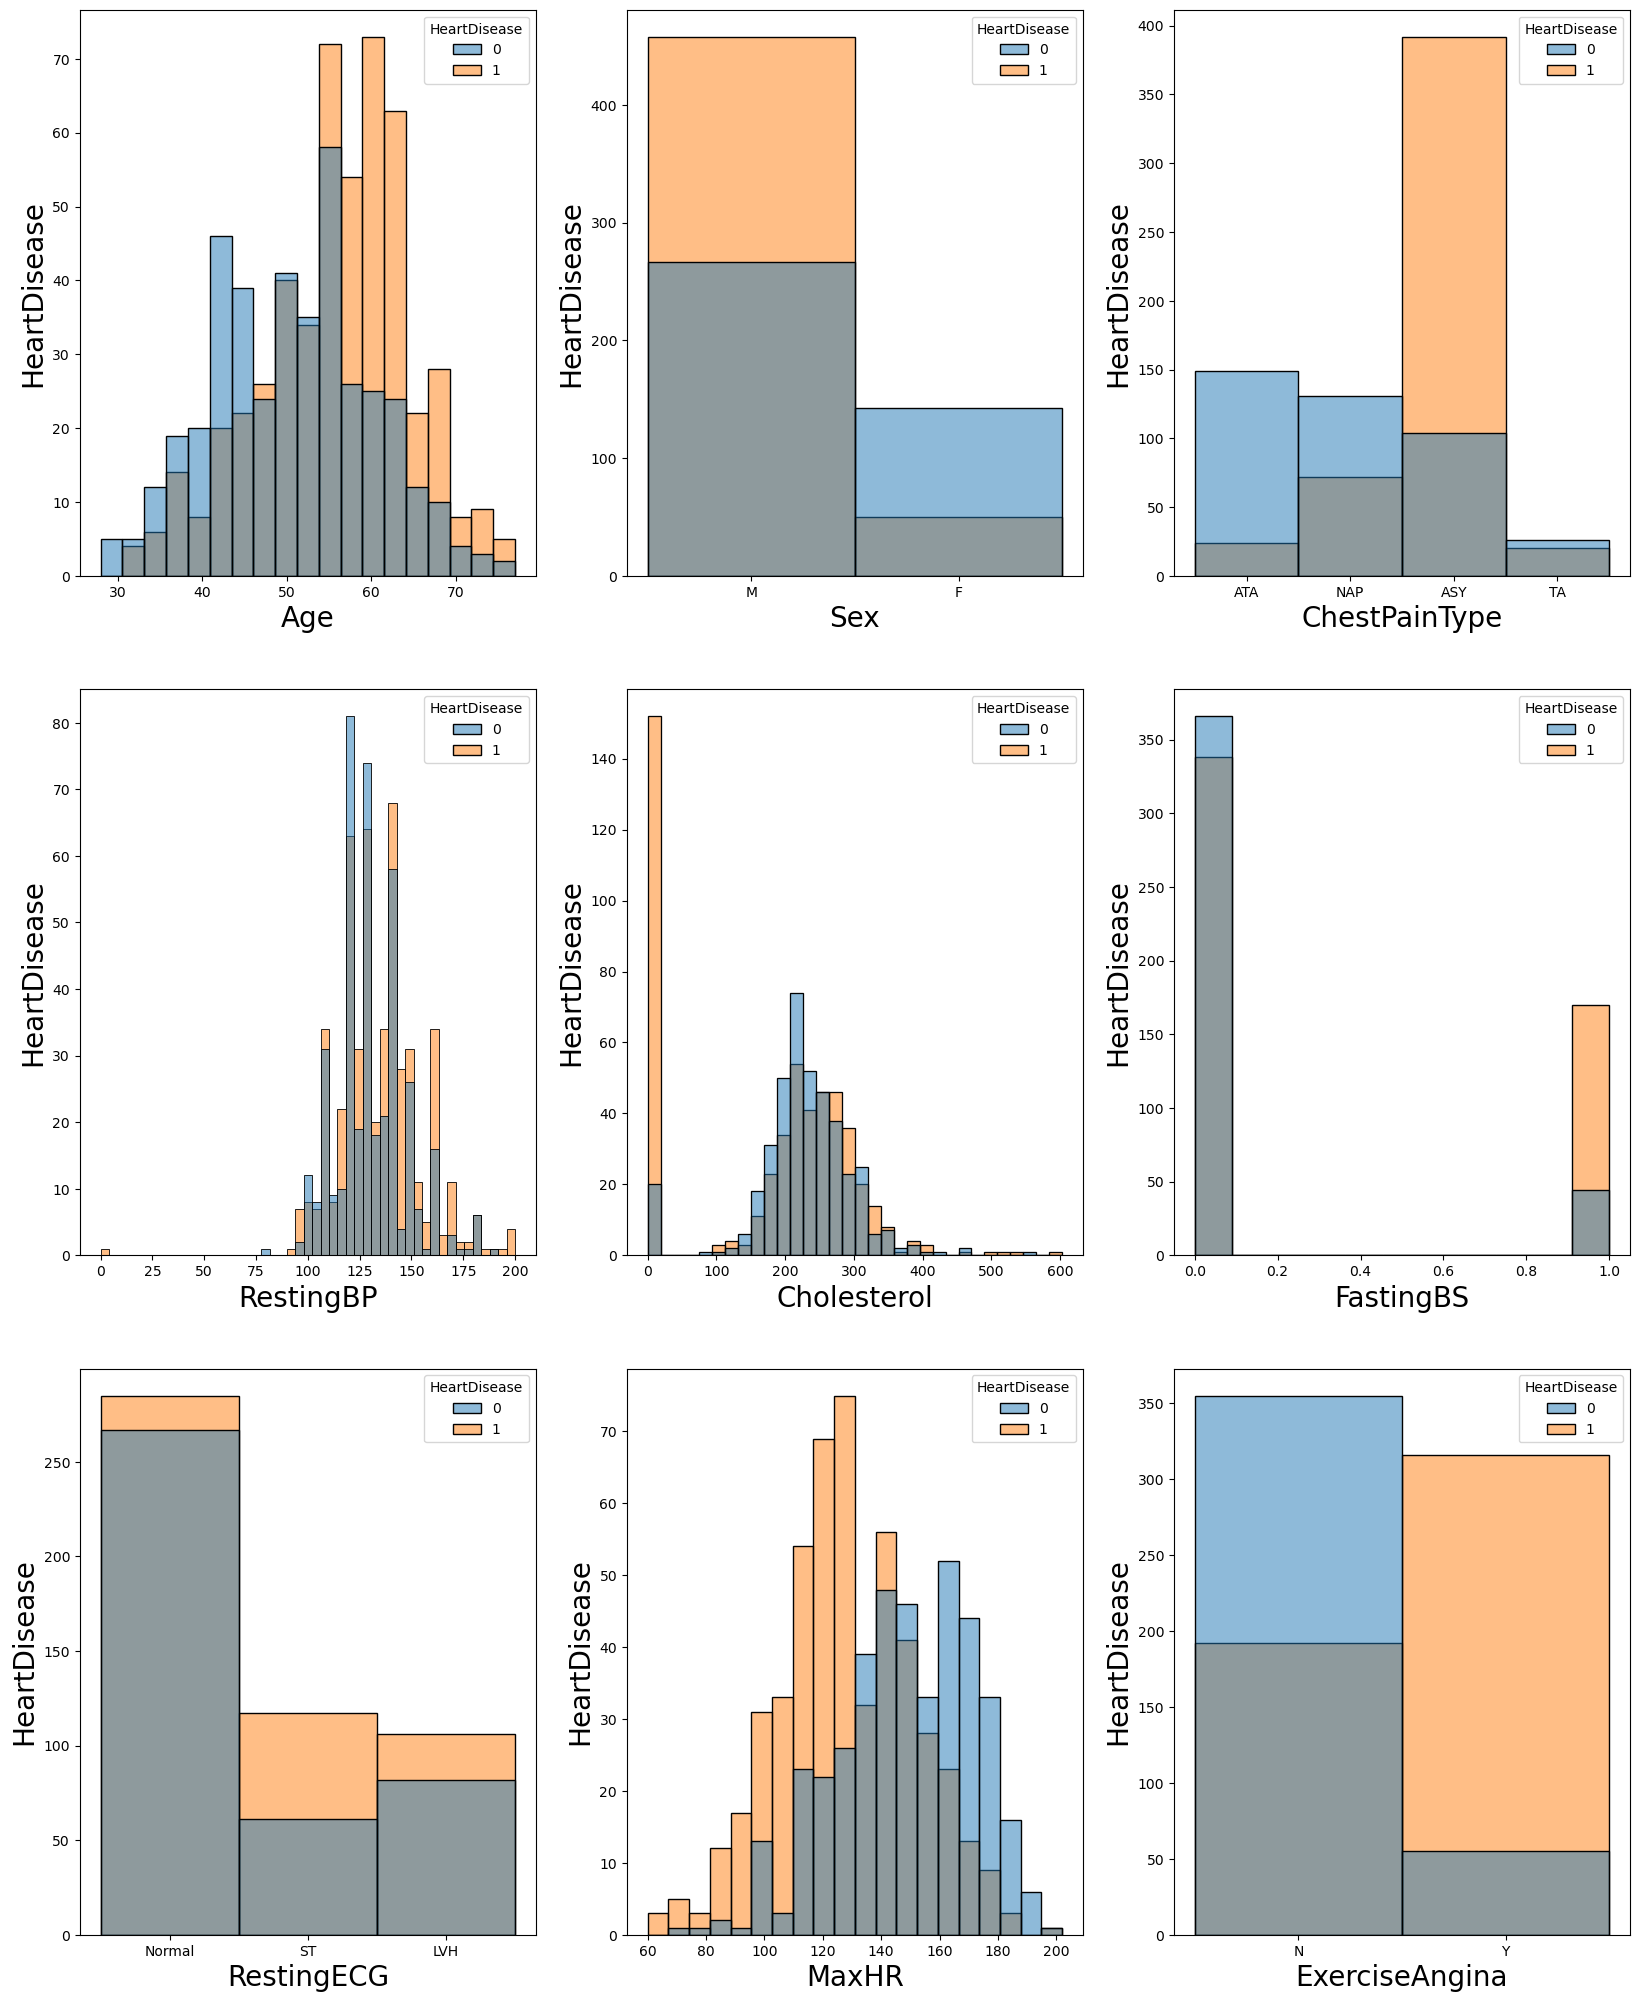

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas


for column in data.columns: # iteration of columns / acessing the columns from  dataset
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=data[column],hue=data.HeartDisease) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

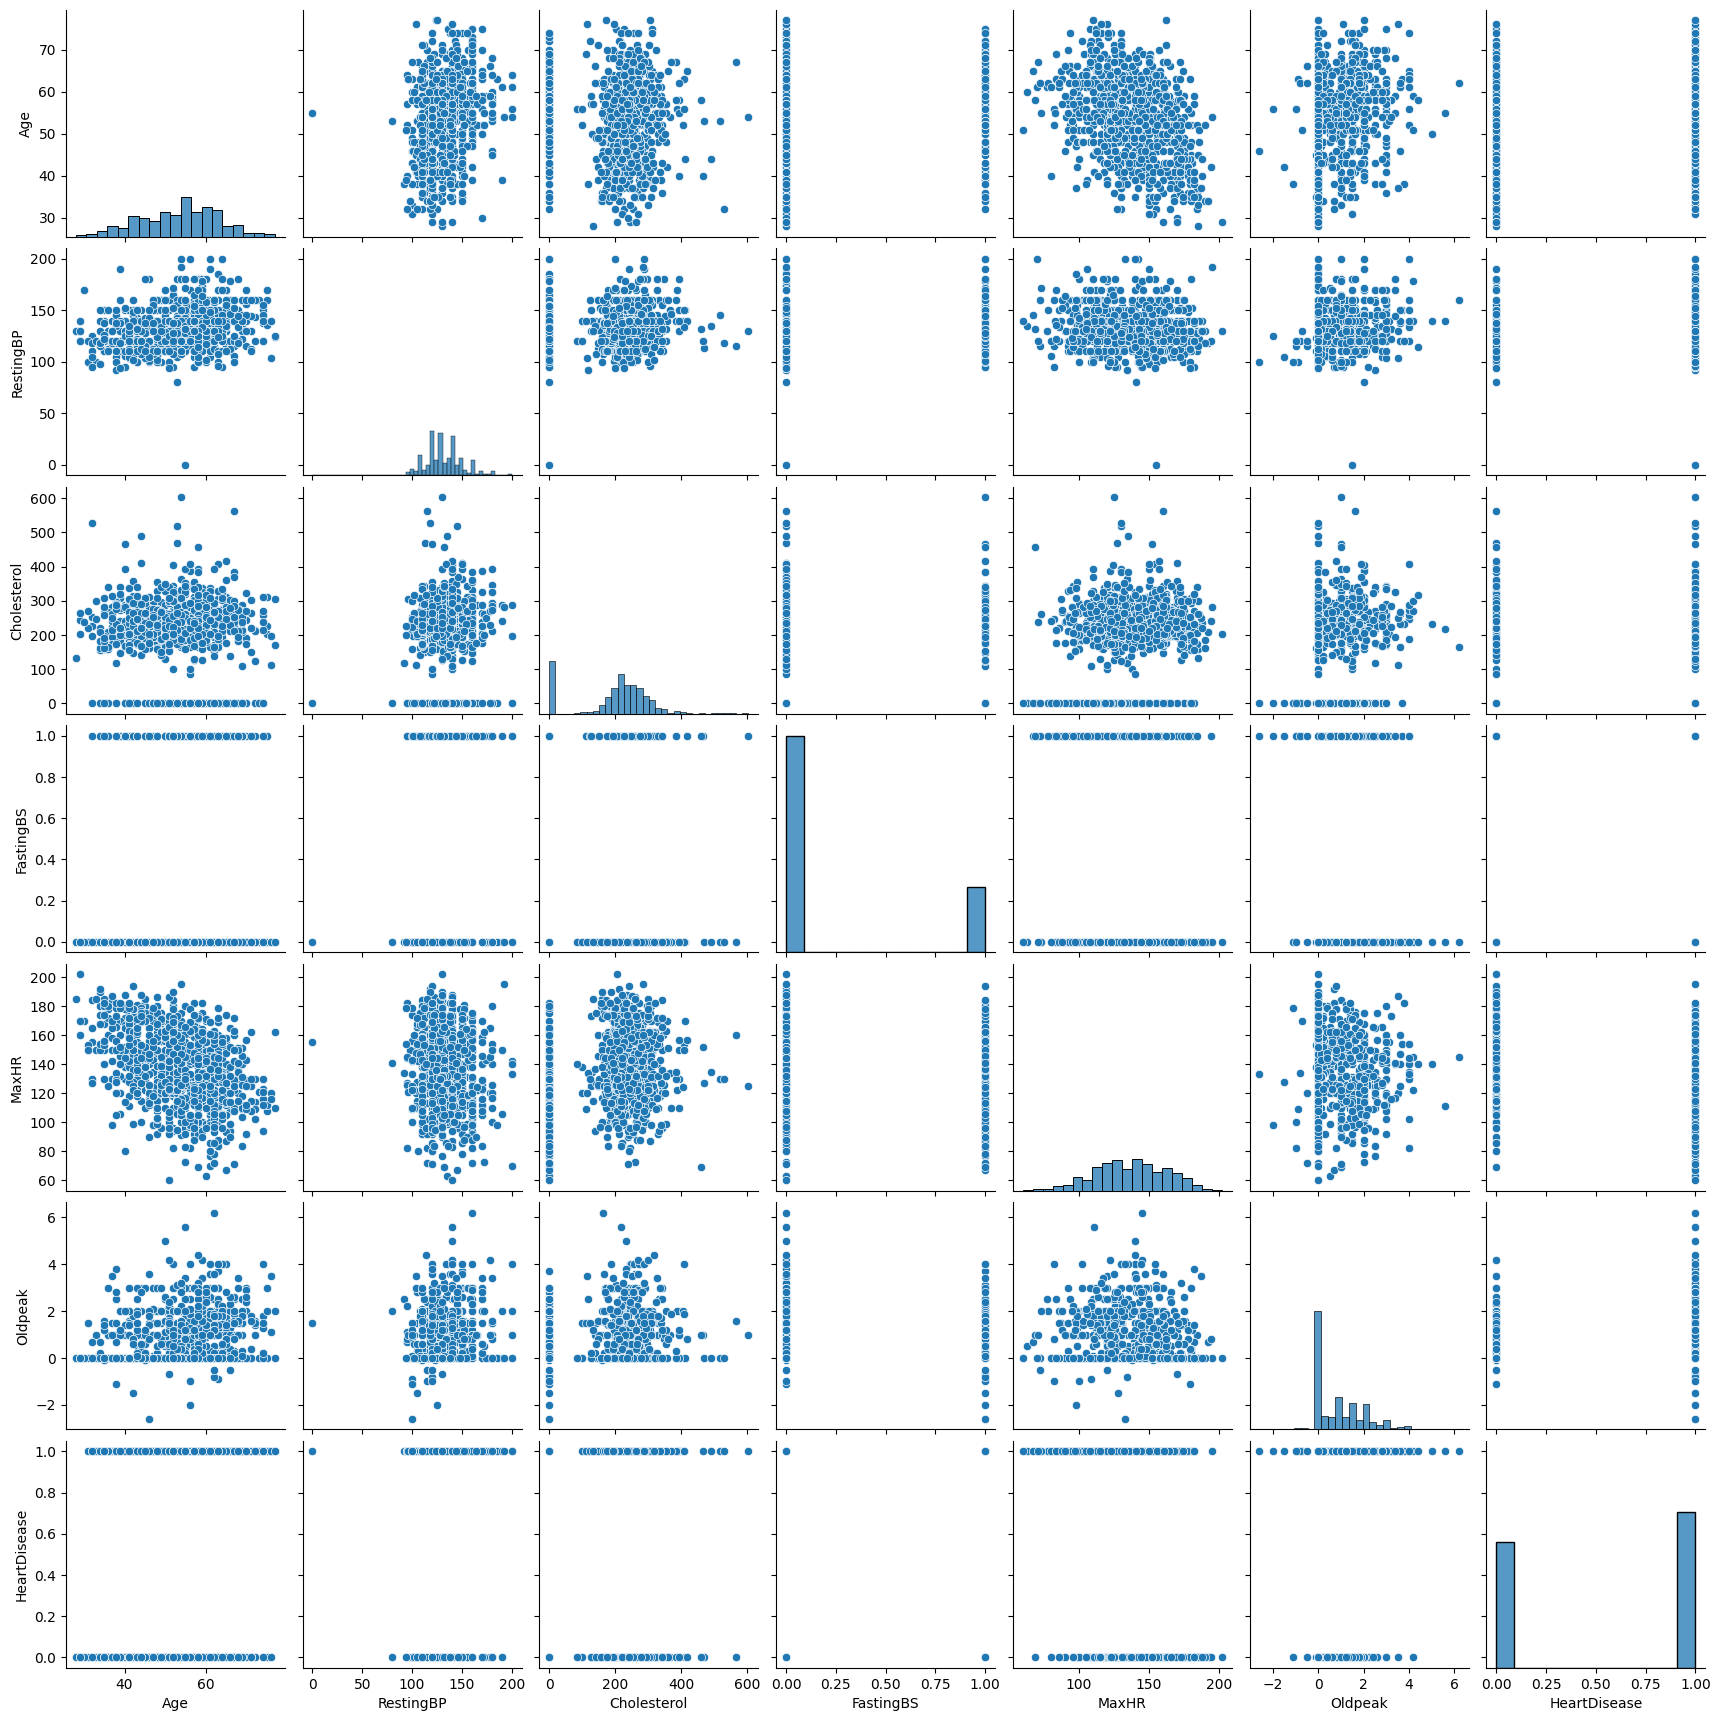

In [ ]:
sns.pairplot(data)

# Data preprocessing

### Checking for null values

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#duplicates
data.duplicated().sum()

0

step 3: if any categorical convert into numerical

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Conversion of categorical columns in to numerical columns

# 1.Sex

### Using LabelEncoder to convert

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex'])

Go with one hot encoding

In [ ]:
df1 = pd.get_dummies(data['Sex'],prefix="Sex",drop_first=True)

data = pd.concat([data,df1],axis=1).drop("Sex",axis=1)

In [ ]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


# 2.ChestPain Type




### Frequency encoding

In [ ]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [ ]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data.cpt.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: cpt, dtype: int64

In [ ]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0


In [ ]:
data.head()

,Age,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,1
3,48,3,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,1


# 3. RestingECG

In [ ]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [ ]:
data.head(3)

,Age,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,N,0.0,Up,0,1
1,49,2,160,180,0,2,156,N,1.0,Flat,1,0
2,37,1,130,283,0,0,98,N,0.0,Up,0,1


# ExerciseAngina

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
data.ExerciseAngina.unique()

array([0, 1])

In [ ]:
data.ExerciseAngina=lb.fit_transform(data['ExerciseAngina'])

In [ ]:
data.head()

,Age,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,0,0.0,Up,0,1
1,49,2,160,180,0,2,156,0,1.0,Flat,1,0
2,37,1,130,283,0,0,98,0,0.0,Up,0,1
3,48,3,138,214,0,2,108,1,1.5,Flat,1,0
4,54,2,150,195,0,2,122,0,0.0,Up,0,1


# ST_Slope

In [ ]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0



In [ ]:
data.head(3)

,Age,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,0,0.0,1,0,1
1,49,2,160,180,0,2,156,0,1.0,2,1,0
2,37,1,130,283,0,0,98,0,0.0,1,0,1


Check the dtypes after converting

In [ ]:
data.dtypes

Age                 int64
cpt                object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Sex_M               uint8
dtype: object

Even though we converted all the categorical column into numerical , still the dtype shows its object

It's because the loc fuction what we used in frequency encoding is converting the values , still the column dtype remains the same


Type cast the dtype manually


In [ ]:
data.cpt=data['cpt'].astype('int32')
data.RestingECG=data['RestingECG'].astype('int32')
data.ST_Slope=data['ST_Slope'].astype('int32')

In [ ]:
data.dtypes

Age                 int64
cpt                 int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
Sex_M               uint8
dtype: object

**Feature Selection**

checking for constant columns

In [ ]:
data.describe()#check for std =0

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


<AxesSubplot:>

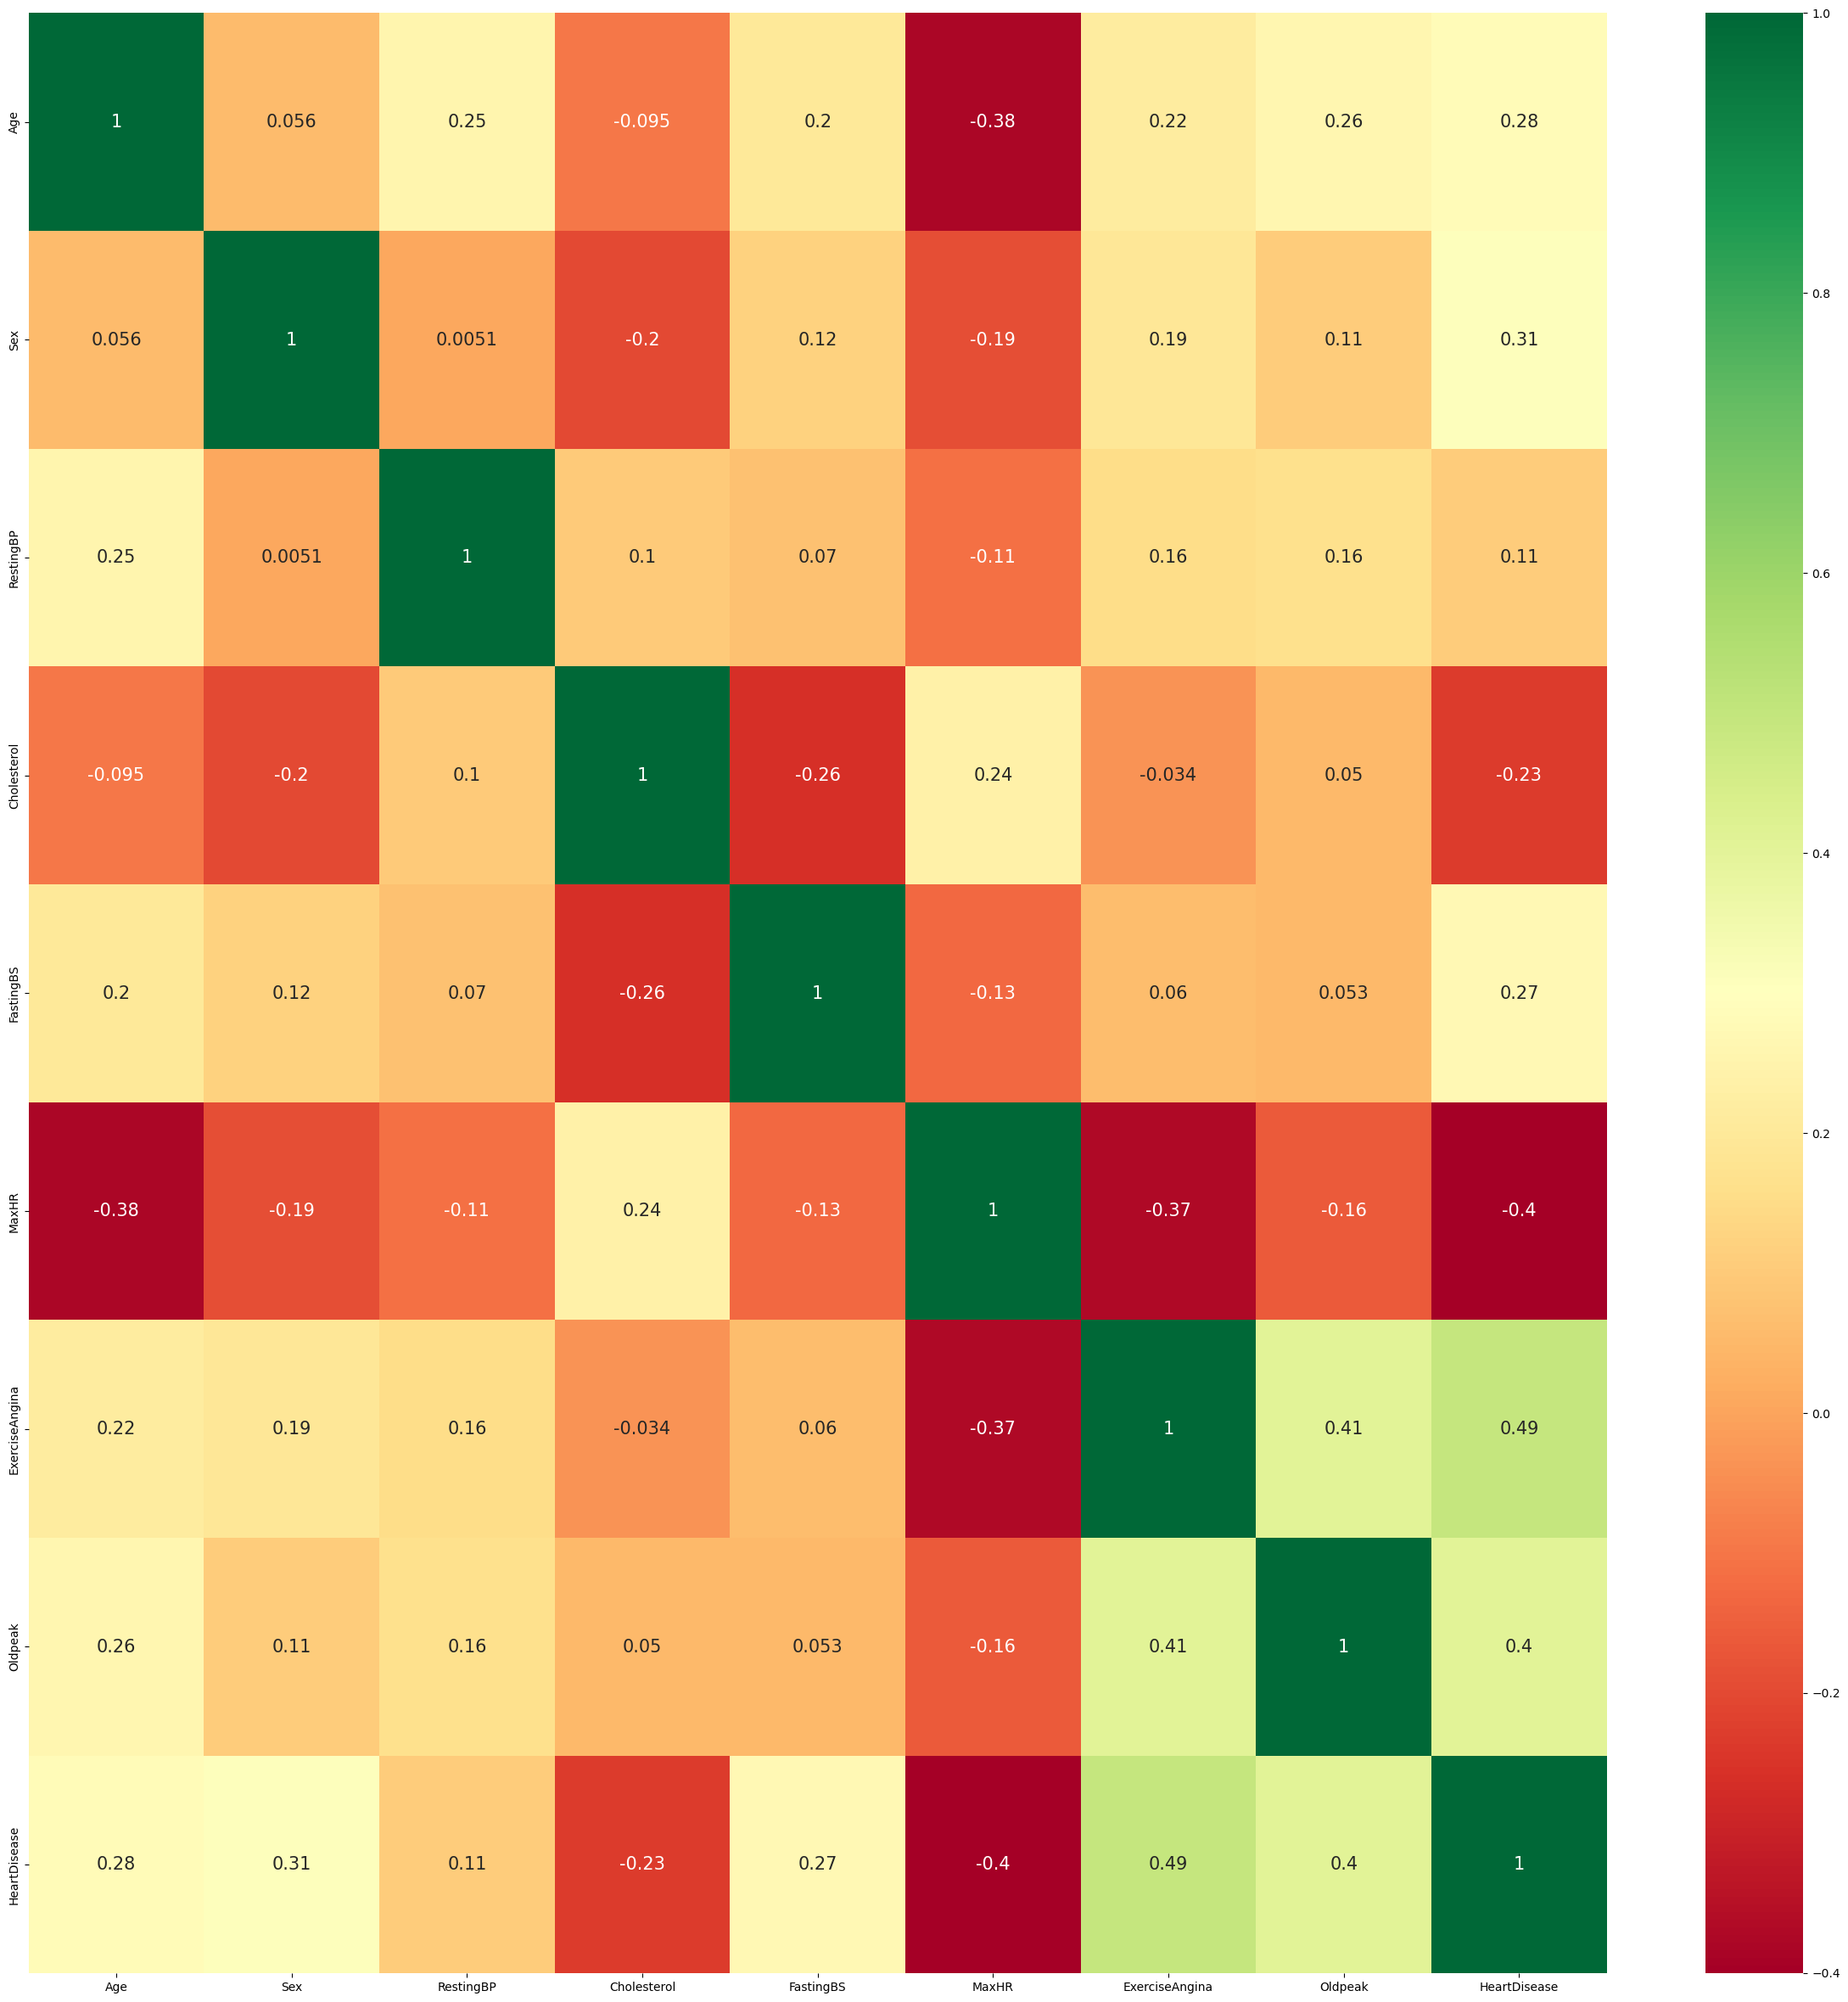

In [ ]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

No dropping of any columns

Model building


In [ ]:
# Split data
x=data.drop('HeartDisease',axis=1)
y=data.HeartDisease

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

# Gradient Boosting


In [ ]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.9239130434782609

In [ ]:
f1_score(y_test,y_pred)

0.9270833333333334

Buidling all other models

Logistic

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8913043478260869

SVM

In [ ]:
# SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7880434782608695

Decision Tree

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8206521739130435

Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9293478260869565

KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8097826086956522

We can implement **Bagging** aswell

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=LR,n_estimators=200)
model_bag.fit(x_train,y_train)
y_pred=model_bag.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8858695652173914

**XG BOOST**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.907608695652174

# Hyperparameter in XGBOOST

In [ ]:
#gamma ---> loss reduction compared with gamma  ; is lr < gamma no split  ; else lr> split split is happeing

#earning_rate --- > pace

#max_depth --> height of the tree

# n_estimators --> number of decision trees to be built

# reg_alpha and reg_lambda ---> regularixation parameters --- reducing the overfittng

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB = XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0, 'reg_alpha': 3.2, 'n_estimators': 65, 'max_depth': 13, 'learning_rate': 0.25, 'gamma': 0.8})


In [ ]:
XGB2=XGBClassifier(reg_lambda= 0, reg_alpha= 3.2, n_estimators=65, max_depth=13,
                   learning_rate=0.25, gamma=0.8)
XGB2.fit(x_train, y_train)#training
y_predict=XGB2.predict(x_test)#testing


In [ ]:
y_train_pred=XGB2.predict(x_train)

In [ ]:
accuracy_score(y_test,y_predict)

0.9184782608695652